In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
import numpy as np
import random
import copy
from networkx.drawing.nx_agraph import graphviz_layout

nx.graphviz_layout = graphviz_layout
random.seed(10)

### Read the adjacency list representation from .json data to a python list

In [2]:
with open(
    "../Jan_Karpiuk.json",
) as data_file:
    data = data_file.read()

adj_list = json.loads(data)
adj_dict = {idx: adj_list[idx] for idx in range(len(adj_list))}

### Create graph from dict of lists

In [3]:
G = nx.from_dict_of_lists(adj_dict)

# Exercise 1
### Draw the graph

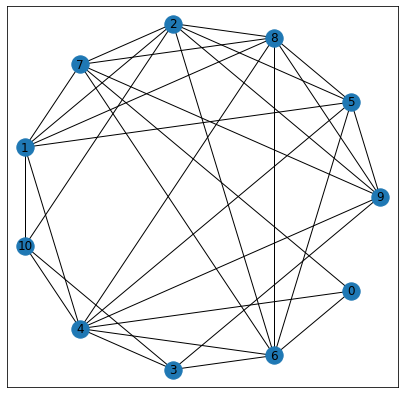

In [4]:

plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.set_facecolor("white")
nx.draw_networkx(G, pos=nx.graphviz_layout(G, prog="circo"))
plt.draw()
plt.savefig("graph_notebook.png")
plt.show()
plt.close()

# Exercise 2
### Show graph incidence matrix

In [5]:
incidence_matrix = nx.incidence_matrix(G).todense()

import pandas as pd
from pandas import *

pd.set_option('precision', 0)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
DataFrame(incidence_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
7,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
8,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1


# Exercise 3
### Check if graph is hamiltonian

In [6]:
def hamilton(G):
    F = [(G,[list(G.nodes())[0]])]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        neighbors = (node for node in graph.neighbors(path[-1]) 
                     if node != path[-1]) #exclude self loops
        for neighbor in neighbors:
            conf_p = path[:]
            conf_p.append(neighbor)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p)==n:
                return p
            else:
                F.append((g,p))
    return None

In [7]:
hamilton(G)

[0, 6, 7, 8, 9, 5, 4, 3, 10, 2, 1]

In [8]:
adjacency_matrix = nx.adjacency_matrix(G).todense()
adjacency_matrix = np.array(adjacency_matrix)
for line in adjacency_matrix:
    print (', '.join(map(str, line)) + ",")

0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,


## Conclusion:
### Graph is hamiltonian
### Hamiltonian cycle: 0⇒4⇒1⇒2⇒10⇒3⇒6⇒5⇒8⇒9⇒7⇒0

# Exercise 4
## Check if graph is eulerian

**Eulerian graph** or Euler’s graph is a graph in which we draw the path between every vertices without retracing the path.

**Euler’s circuit**: If the starting and ending vertices are same in the graph then it is known as Euler’s circuit.

**Necessary conditions for Eulerian circuits**: The necessary condition required for eulerian circuits is that all the vertices of graph should have an even degree.

In [9]:
G.degree()

DegreeView({0: 3, 1: 6, 2: 7, 3: 4, 4: 8, 5: 6, 6: 7, 7: 6, 8: 7, 9: 6, 10: 4})

In [10]:
# check if all the vertices of graph have an even degree
has_eulerian_circut = all(d % 2 == 0 for v, d in G.degree())

if has_eulerian_circut:
    conclusion = "The graph is eulerian"
else:
    conclusion = "The graph is not eulerian"

print("Conclusion: " + conclusion)

Conclusion: The graph is not eulerian


In [11]:
if nx.is_eulerian(G):
    conclusion = "The graph is eulerian"
else:
    conclusion = "The graph is not eulerian"

print("Conclusion: " + conclusion)

Conclusion: The graph is not eulerian


**Euler’s Path**: Euler’s path is path in the graph that contains each edge exactly once and each vertex at least once .

**Necessary conditions for Eulerian paths**: If two vertices have odd degree and all other vertices have even degree. Note that only one vertex with odd degree is not possible in an undirected graph (sum of all degrees is always even in an undirected graph)

In [12]:
G.degree()

DegreeView({0: 3, 1: 6, 2: 7, 3: 4, 4: 8, 5: 6, 6: 7, 7: 6, 8: 7, 9: 6, 10: 4})

In [13]:
has_eulerian_path = sum(d % 2 == 1 for v, d in G.degree()) in (0, 2)

if has_eulerian_path:
    conclusion = "The graph is semi-eulerian"
else:
    conclusion = "The graph is not semi-eulerian"

print("Conclusion: " + conclusion)

Conclusion: The graph is not semi-eulerian


In [14]:
if nx.is_semieulerian(G):
    conclusion = "The graph is semi-eulerian"
else:
    conclusion = "The graph is not semi-eulerian"

print("Conclusion: " + conclusion)

Conclusion: The graph is not semi-eulerian


# Exercise 5
## Colorize graph by vertecies and edges

In [15]:
node_colors = nx.coloring.greedy_color(G, strategy="largest_first")

# sort node to color dict by keys
node_colors = dict(sorted(node_colors.items()))
node_colors

{0: 2, 1: 1, 2: 0, 3: 2, 4: 0, 5: 3, 6: 1, 7: 3, 8: 2, 9: 1, 10: 3}

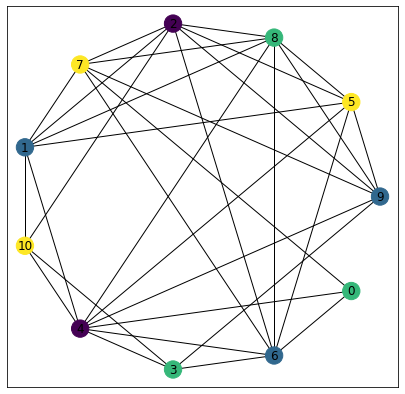

In [16]:
plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.set_facecolor("white")
nx.draw_networkx(G, pos=nx.graphviz_layout(G, prog="circo"), node_color=list(node_colors.values()))
plt.draw()
plt.savefig("graph_notebook_exer_5.png")
plt.show()
plt.close()

In [17]:
edge_colors = {}

# Exercise 6
## Get graph's chromatic number (vertecies) and chromatic index (edges) 

In [18]:
# get Graph chromatic number
chromatic_number = len(set(node_colors.values())) 

print("Graph chromatic number: " + str(chromatic_number))

Graph chromatic number: 4


In [19]:
# get Graph chromatic index
chromatic_index = len(set(edge_colors.values())) 

print("Graph chromatic number: " + str(chromatic_index))

Graph chromatic number: 0


# Exercise 7
## Get graph's minimum spanning tree 

**A minimum spanning tree** (MST) or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. That is, it is a spanning tree whose sum of edge weights is as small as possible.

In [20]:
# create deep copy of the Graph
weighted_G = copy.deepcopy(G)
min_span_tree = nx.minimum_spanning_tree(weighted_G)

# assign random weights to edges
rnd_weights = {edge: random.randrange(0,10) for edge in weighted_G.edges()}
for edge in weighted_G.edges():
        weighted_G[edge[0]][edge[1]]['weight'] = rnd_weights[edge]

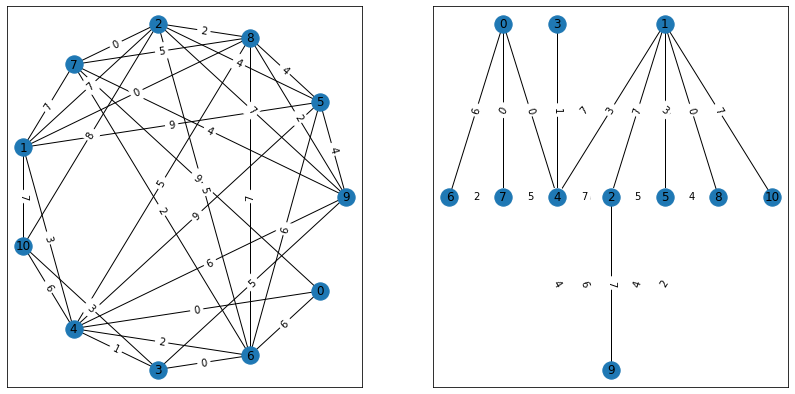

In [21]:
plt.figure(figsize=(14, 7))
ax.set_facecolor("white")

# draw the Graph with weights
plt.subplot(1, 2, 1)

pos_1=nx.graphviz_layout(weighted_G, prog="circo")
nx.draw_networkx(weighted_G, pos_1)
labels = nx.get_edge_attributes(weighted_G,'weight')
nx.draw_networkx_edge_labels(weighted_G,pos_1,edge_labels=labels)

# draw the minimum spanning tree with weights
plt.subplot(1, 2, 2)

pos_2=nx.graphviz_layout(min_span_tree, prog="dot")
nx.draw_networkx(min_span_tree, pos_2)
labels = nx.get_edge_attributes(weighted_G,'weight')
nx.draw_networkx_edge_labels(min_span_tree,pos_2,edge_labels=labels)

plt.draw()
plt.savefig("graph_notebook_exer_7.png")
plt.show()
plt.close()

# Exercise 8
## Check if Graph is planar

**Planar graph** is a graph that can be embedded in the plane, i.e., it can be drawn on the plane in such a way that its edges intersect only at their endpoints. In other words, it can be drawn in such a way that no edges cross each other.

**Kuratowski's theorem** is a mathematical forbidden graph characterization of planar graphs, named after Kazimierz Kuratowski. It states that a finite graph is planar if and only if it does not contain a subgraph that is a subdivision of K5 (the complete graph on five vertices) or of K3,3 (complete bipartite graph on six vertices, three of which connect to each of the other three, also known as the utility graph).

In [22]:
is_planar, certificate = nx.check_planarity(G, counterexample=True)

if is_planar:
    conclusion = "The graph is planar"
else:
    conclusion = "The graph is not planar"

print("Conclusion: " + conclusion)

Conclusion: The graph is not planar


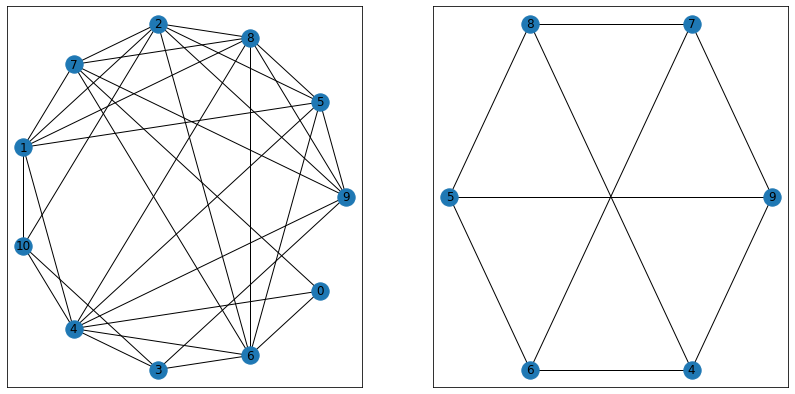

In [23]:
plt.figure(figsize=(14, 7))
ax.set_facecolor("white")

# draw the Graph
plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos=nx.graphviz_layout(G, prog="circo"))

# draw the Kuratowski subgraph in Graph
plt.subplot(1, 2, 2)
nx.draw_networkx(certificate, pos=nx.graphviz_layout(certificate, prog="circo"))

plt.draw()
plt.savefig("graph_notebook_exer_8.png")
plt.show()
plt.close()